# NYC Airbnb Stats
Exploratory analysis of a New York City Airbnb dataset using Pandas, Seaborn, and Plotly.

In [1]:
#Import necessary Modules, Packages, and Libraries 
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#Jupyter magic to display plots within the notebook
%matplotlib inline

### Data from __[kaggle.com](https://www.kaggle.com/datasets)__. An open source website for public datasets.

In [3]:
df = pd.read_csv('editedAB_NYC_2019.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
id                                48895 non-null int64
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 4.8+ MB


In [5]:
df.head()

id  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539     2787            Brooklyn    Kensington  40.64749  -73.97237   
1  2595     2845           Manhattan       Midtown  40.75362  -73.98377   
2  3647     4632           Manhattan        Harlem  40.80902  -73.94190   
3  3831     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Checking the median and average Prices, Minimum Nights, and Number of Reviews

In [10]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, Markdown, clear_output

columns=['price','minimum_nights','number_of_reviews']


@interact
def indice_dropdown(Choices=['price','minimum_nights','number_of_reviews']):
    print(Choices)
    print (df[Choices].describe())
#print ('\n')
print (df["neighbourhood_group"].describe())

interactive(children=(Dropdown(description='Choices', options=('price', 'minimum_nights', 'number_of_reviews')…

count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object


In [21]:
menu = widgets.Dropdown(
       options=columns,
       value='price',
       description='Choices:')

In [22]:
button = widgets.Button(description='Enter')
out = widgets.Output()
def on_button_clicked(_):
    # "linking function with output"
    with out:
        # what happens when we press the button
        clear_output()
        print(menu.value)
        print (df[menu.value].describe())
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([menu,button,out])

### Dataset by Room Type
Most of the Airbnb locations in this dataset are Entire Home/Apt with 52%.

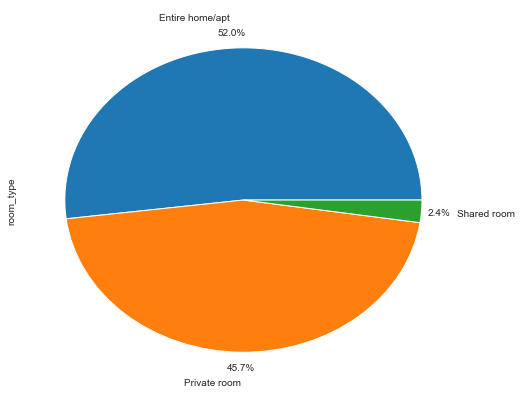

In [7]:
df['room_type'].value_counts().plot(kind='pie',figsize=(8, 7), autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.2)

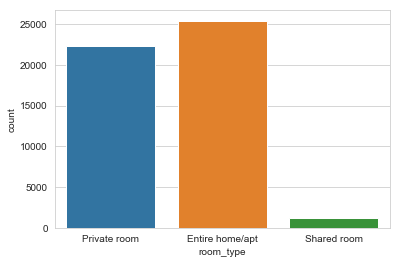

In [8]:
p = sns.countplot(data=df, x = 'room_type')

In [9]:
#Number of Occurances:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### Interactive Data Visualizations with Plotly and Cufflinks

In [10]:
#Import necessary libraries
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.4.1


In [11]:
import cufflinks as cf

In [12]:
# For Notebooks
init_notebook_mode(connected=True)

In [13]:
# For offline use
cf.go_offline()

In [14]:
room_price = df[['room_type', 'price']]
room_price.pivot(columns='room_type', values='price').iplot(kind='box', boxpoints=False)

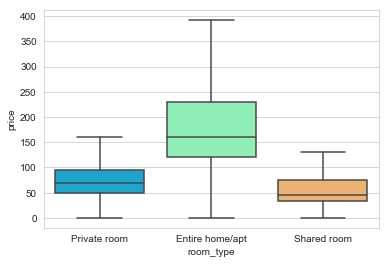

In [15]:
#Room Type BoxPlot without Outliers
sns.boxplot(x='room_type',y='price',data=df, showfliers=False, palette='rainbow')

### Dataset by Borough
Most of the Airbnbs in this dataset were located in Manhatthan with 44.3% followed by Brooklyn with 41.1%.

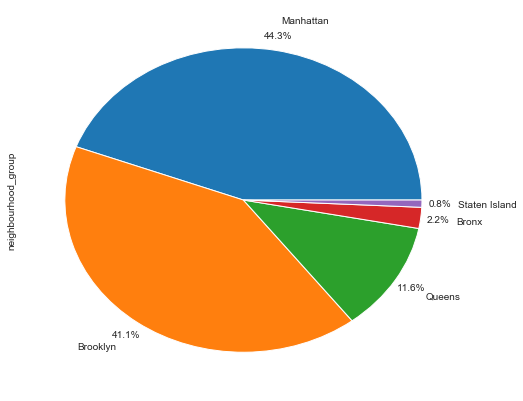

In [16]:
df['neighbourhood_group'].value_counts().plot(kind='pie',figsize=(8, 7), autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.2)

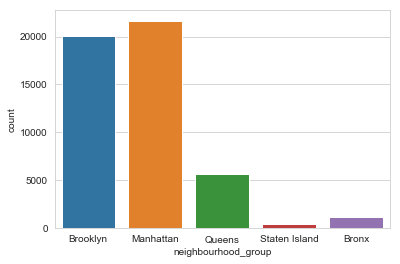

In [17]:
p = sns.countplot(data=df, x = 'neighbourhood_group')

In [18]:
#Number of Occurances:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [19]:
neighbourhood_group_boxplot = df[['neighbourhood_group', 'price']]
neighbourhood_group_boxplot.pivot(columns='neighbourhood_group', values='price').iplot(kind='box', boxpoints=False)

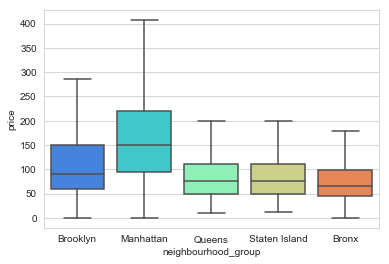

In [20]:
#Neighbourhood Group BoxPlot without Outliers
sns.boxplot(x='neighbourhood_group',y='price',data=df, showfliers=False, palette='rainbow')

## Breakdown of Median Prices by neighbourhood within each Borough

In [23]:
neighbourhood_group= df.neighbourhood_group.unique()


#Using interactive Widgets
@interact
def borough_dropdown(Boroughs=neighbourhood_group):
    s=Boroughs
    name=s.split()
    if s == "Staten Island":
        name=['Staten Island']
    nprices= df[df.neighbourhood_group.isin(name)].groupby('neighbourhood').median()['price']
    n_ngroup= df[df.neighbourhood_group.isin(name)].neighbourhood.unique()
    print(neighbourhood_group)
    #print(name)
    print('The median price in', name[0], 'is : ', df[df.neighbourhood_group.isin(name)].median()['price'], 'dollars' )
    print('Below is the median price by neighborhood in', name[0])
    print(nprices.sort_values(ascending=False))

interactive(children=(Dropdown(description='Boroughs', options=('Brooklyn', 'Manhattan', 'Queens', 'Staten Isl…

In [24]:
#Using hardcoded Widgets

menu_borough = widgets.Dropdown(
       options=neighbourhood_group,
       value='Brooklyn',
       description='Boroughs:')

In [26]:
button_borough = widgets.Button(description='Enter')
out_borough = widgets.Output()
def on_button_clicked(_):
    # "linking function with output"
    with out_borough:
        # what happens when we press the button
        clear_output()
        s=menu_borough.value
        name=s.split()
        if s == "Staten Island":
            name=['Staten Island']
        nprices= df[df.neighbourhood_group.isin(name)].groupby('neighbourhood').median()['price']
        n_ngroup= df[df.neighbourhood_group.isin(name)].neighbourhood.unique()
        print(neighbourhood_group)
    #print(name)
        print('The median price in', name[0], 'is : ', df[df.neighbourhood_group.isin(name)].median()['price'], 'dollars' )
        print('Below is the median price by neighborhood in', name[0])
        print(nprices.sort_values(ascending=False))

# linking button and function together using a button's method
button_borough.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([menu_borough,button_borough,out_borough])

(array([  880., 10852., 10145.,  7938.,  5578.,  3717.,  2942.,  1917.,
         1008.,   941.]),
 array([  0. ,  33.3,  66.6,  99.9, 133.2, 166.5, 199.8, 233.1, 266.4,
        299.7, 333. ]),
 <a list of 10 Patch objects>)

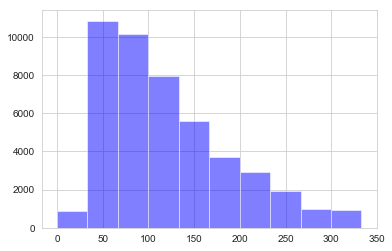

In [22]:
# Plot a histogram of prices excluding outliers
plt.hist(df["price"][df['price'] < 334], 
         alpha=0.5, 
         color='#0000FF',
         label='Price')